In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils import shuffle

data = pd.read_csv('data/driving_log_relative.csv')

print (data.head())
print("\nTotal Samples:", len(data))

                                   center  \
0  IMG/center_2026_01_05_19_43_49_251.jpg   
1  IMG/center_2026_01_05_19_43_49_354.jpg   
2  IMG/center_2026_01_05_19_43_49_458.jpg   
3  IMG/center_2026_01_05_19_43_49_563.jpg   
4  IMG/center_2026_01_05_19_43_49_665.jpg   

                                   left  \
0  IMG/left_2026_01_05_19_43_49_251.jpg   
1  IMG/left_2026_01_05_19_43_49_354.jpg   
2  IMG/left_2026_01_05_19_43_49_458.jpg   
3  IMG/left_2026_01_05_19_43_49_563.jpg   
4  IMG/left_2026_01_05_19_43_49_665.jpg   

                                   right  steering  throttle  brake     speed  
0  IMG/right_2026_01_05_19_43_49_251.jpg       0.0       0.0    0.0  0.000078  
1  IMG/right_2026_01_05_19_43_49_354.jpg       0.0       0.0    0.0  0.000079  
2  IMG/right_2026_01_05_19_43_49_458.jpg       0.0       0.0    0.0  0.000078  
3  IMG/right_2026_01_05_19_43_49_563.jpg       0.0       0.0    0.0  0.000082  
4  IMG/right_2026_01_05_19_43_49_665.jpg       0.0       0.0    0.0  0

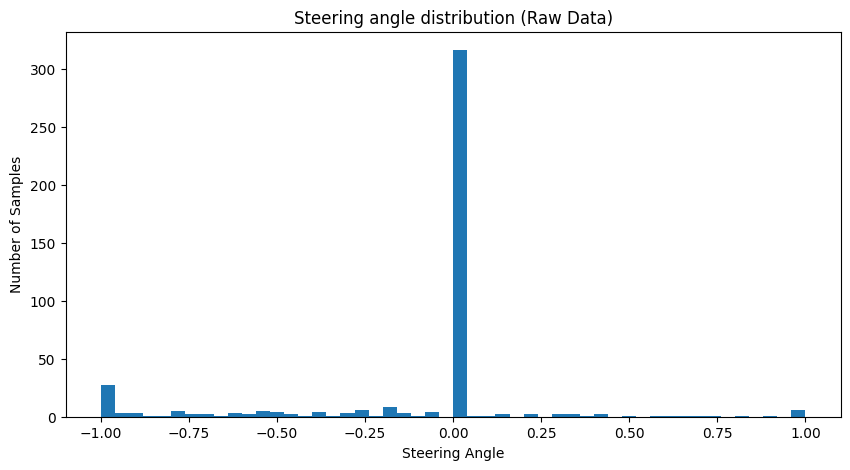

In [4]:
steering  = data['steering']

plt.figure(figsize = (10,5))
plt.hist(steering, bins = 50)

plt.title("Steering angle distribution (Raw Data)")
plt.xlabel("Steering Angle")
plt.ylabel("Number of Samples")

plt.show()

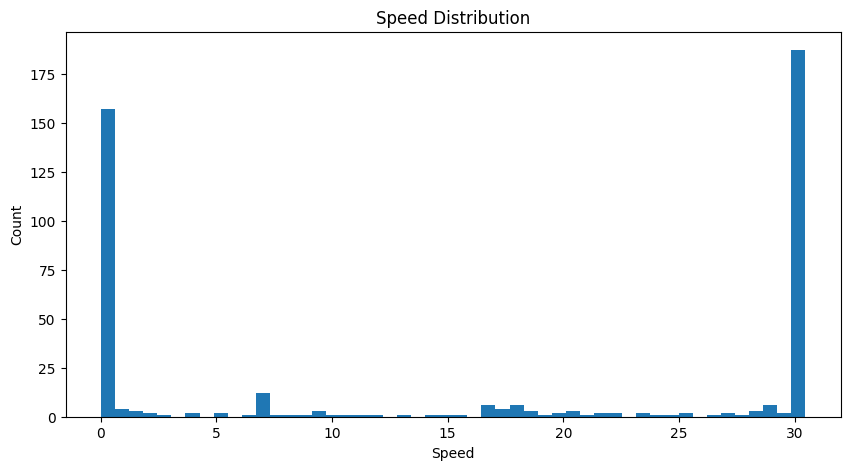

In [7]:
plt.figure(figsize=(10,5))
plt.hist(data['speed'], bins = 50)
plt.title("Speed Distribution")
plt.xlabel("Speed")
plt.ylabel("Count")

plt.show()

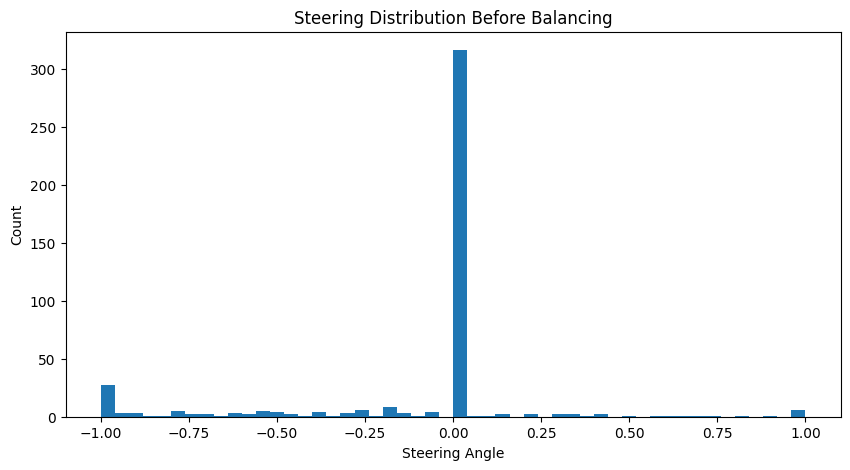

In [8]:
steering = data ['steering']

plt.figure(figsize = (10,5))
plt.hist(steering, bins = 50)
plt.title("Steering Distribution Before Balancing")
plt.xlabel("Steering Angle")
plt.ylabel("Count")
plt.show()

In [10]:
NUM_BINS = 25
MAX_SAMPLES = 200
hist, bins = np.histogram(steering, NUM_BINS)

keep_prob = []

for count in hist:
    if count < MAX_SAMPLES:
        keep_prob.append(1.)
    else:
        keep_prob.append(MAX_SAMPLES / count)
        
remove_indices = []
for i, angle in enumerate(steering):
    bin_idx = np.digitize(angle, bins) - 1
    if bin_idx >= 0 and bin_idx < len(keep_prob) and np.random.rand() > keep_prob[bin_idx]:
        remove_indices.append(i)
        
balanced_data = data.drop(data.index[remove_indices])
balanced_data = shuffle(balanced_data)

print("Samples before balancing:", len(data))
print("Samples after balancing:", len(balanced_data))

Samples before balancing: 436
Samples after balancing: 314


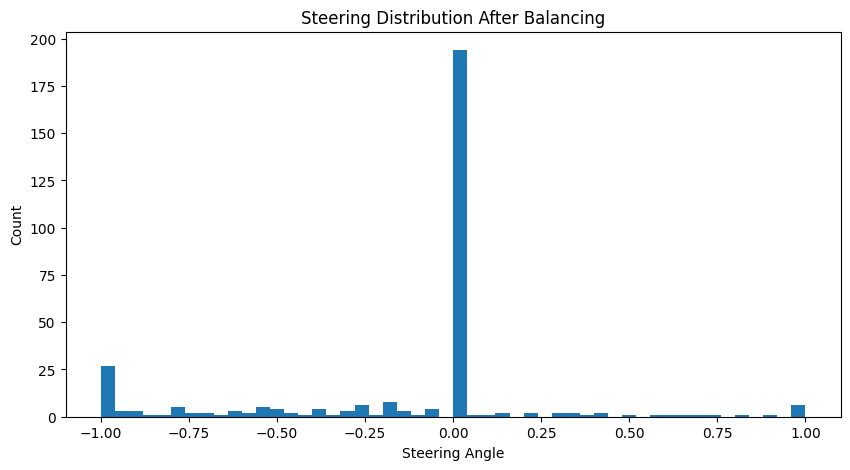

In [11]:
plt.figure(figsize = (10,5))
plt.hist(balanced_data['steering'], bins = 50)
plt.title("Steering Distribution After Balancing")
plt.xlabel("Steering Angle")
plt.ylabel("Count")
plt.show()

In [12]:
balanced_data.to_csv('data/balanced_driving_log.csv', index = False)